In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

制作用户的信用评分卡

In [2]:
data = pd.read_csv("../data/logisitcRegression/rankingcard.csv")
data.shape

(150000, 12)

# EDA与预处理

In [3]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [6]:
data.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## 去除重复数据

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
# 数据删除后恢复索引

data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## 填补缺失值

In [9]:
data.isnull().sum()/data.shape[0]

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [10]:
# 使用均值填补家属人数

data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [16]:
data.isnull().mean()

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [19]:
# 删除无意义的列
del data["Unnamed: 0"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

使用随机森林填补收入缺失值

In [17]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [23]:
def fill_missing_rf(X,y,to_fill):
    """
    使用随机森林填补一个特征的缺失值的函数
    参数:
    X:要填补的特征矩阵
    y:完整的,没有缺失值的标签
    to_fill:字符串,要填补的那一列的名称
    """
    #构建我们的新特征矩阵和新标签
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    #找出我们的训练集和测试集
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index,:]
    Xtest = df.iloc[Ytest.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as rfr
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Ypredict = rfr.predict(Xtest)
    return Ypredict

In [21]:
x = data.iloc[:, 1:]
y = data["SeriousDlqin2yrs"]
x.shape

(150000, 10)

In [24]:
y_pred = fill_missing_rf(x, y, "MonthlyIncome")

In [25]:
data.loc[data.loc[:, "MonthlyIncome"].isnull(), "MonthlyIncome"] = y_pred

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

## 处理异常值

可以使用箱线图或3σ来查找异常值。

In [27]:
# 数据的描述性统计
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.0,0.002969,0.029867,0.154181,0.559046,0.981278,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.0,0.030874,0.175074,0.366508,0.868254,1267.000000,4979.040000,329664.0
MonthlyIncome,150000.0,5416.179184,13247.162762,0.0,0.0,0.170000,1800.000000,4402.032353,7400.000000,10770.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [28]:
(data["age"] == 0).sum()

1

In [29]:
# 删除年龄为0的异常值
data = data[data["age"] != 0]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149999 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149999 non-null  float64
 2   age                                   149999 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149999 non-null  int64  
 4   DebtRatio                             149999 non-null  float64
 5   MonthlyIncome                         149999 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149999 non-null  int64  
 7   NumberOfTimes90DaysLate               149999 non-null  int64  
 8   NumberRealEstateLoansOrLines          149999 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149999 non-null  int64  
 10  NumberOfDependents                    149999 non-null  float64
dtype

In [31]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149999.0,0.066840,0.249746,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149999.0,6.048472,249.756203,0.0,0.0,0.002969,0.029867,0.154176,0.559044,0.981256,1.092958,50708.0
age,149999.0,52.295555,14.771298,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149999.0,0.421029,4.192795,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149999.0,353.007426,2037.825113,0.0,0.0,0.030871,0.175074,0.366503,0.868257,1267.000000,4979.080000,329664.0
MonthlyIncome,149999.0,5416.175292,13247.206834,0.0,0.0,0.170000,1800.000000,4402.000000,7400.000000,10770.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149999.0,8.452776,5.145964,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149999.0,0.265975,4.169318,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149999.0,1.018233,1.129772,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149999.0,0.240388,4.155193,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [37]:
# 删除两年内违约超过30-95天超过98次的记录
data.loc[:, "NumberOfTimes90DaysLate"].value_counts()

0     141661
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [38]:
data = data[data.loc[:, "NumberOfTimes90DaysLate"] < 90]

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149730 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149730 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149730 non-null  float64
 2   age                                   149730 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149730 non-null  int64  
 4   DebtRatio                             149730 non-null  float64
 5   MonthlyIncome                         149730 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149730 non-null  int64  
 7   NumberOfTimes90DaysLate               149730 non-null  int64  
 8   NumberRealEstateLoansOrLines          149730 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149730 non-null  int64  
 10  NumberOfDependents                    149730 non-null  float64
dtype

In [40]:
data.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149730.0,0.065979,0.248246,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149730.0,6.057542,249.980364,0.0,0.0,0.002943,0.029771,0.153488,0.555592,0.977992,1.093343,50708.0
age,149730.0,52.327984,14.754371,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149730.0,0.245789,0.697779,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,13.0
DebtRatio,149730.0,353.631316,2039.601344,0.0,0.0,0.032376,0.175994,0.367119,0.870023,1270.000000,4983.000000,329664.0
MonthlyIncome,149730.0,5421.336609,13257.923564,0.0,0.0,0.170000,1800.000000,4416.000000,7408.750000,10788.100000,23235.500000,3008750.0
NumberOfOpenCreditLinesAndLoans,149730.0,8.467949,5.138107,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149730.0,0.090456,0.485529,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,17.0
NumberRealEstateLoansOrLines,149730.0,1.020063,1.129961,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149730.0,0.064823,0.330074,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.0


In [41]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149730 entries, 0 to 149729
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149730 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149730 non-null  float64
 2   age                                   149730 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149730 non-null  int64  
 4   DebtRatio                             149730 non-null  float64
 5   MonthlyIncome                         149730 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149730 non-null  int64  
 7   NumberOfTimes90DaysLate               149730 non-null  int64  
 8   NumberRealEstateLoansOrLines          149730 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149730 non-null  int64  
 10  NumberOfDependents                    149730 non-null  float64
dtype

In [42]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


数据存在偏态，因为要服务业务，如果对数据作标准化，归一化业务人员没有办法知道具体的特征含义，所以先用这样的数据训练。

## 处理样本不均衡问题

In [54]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [55]:
y.value_counts()

0    139851
1      9879
Name: SeriousDlqin2yrs, dtype: int64

In [56]:
n_sample = x.shape[0]
y.value_counts()
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]
print('样本个数:{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample, n_1_sample/n_sample, n_0_sample/n_sample))

样本个数:149730; 1占6.60%; 0占93.40%


In [57]:
# 专门处理不均衡数据的库
from imblearn.over_sampling import SMOTE

In [58]:
sm = SMOTE(random_state = 42)
x, y = sm.fit_sample(x, y)

In [59]:
x.shape

(279702, 10)

In [61]:
n_sample_ = x.shape[0]
pd.Series(y).value_counts()
n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]
print('样本个数:{}; 1占{:.2%}; 0占{:.2%}'.format(n_sample_,n_1_sample/n_sample_,n_0_sample/n_sample_))

样本个数:279702; 1占50.00%; 0占50.00%


## 分训练集和测试集

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

X_train, X_vali, Y_train, Y_vali = train_test_split(x,y,test_size=0.3,random_state=420)

model_data = pd.concat([Y_train, X_train], axis=1)
model_data.index = range(model_data.shape[0])

vali_data = pd.concat([Y_vali, X_vali], axis=1)
vali_data.index = range(vali_data.shape[0])

model_data.columns = data.columns
vali_data.columns = data.columns

model_data.to_csv(r"../data/logisitcRegression/model_data.csv")
vali_data.to_csv(r"../data/logisitcRegression/vali_data.csv")

In [65]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1.000000,44,1,2853.000000,0.070000,8,0,1,0,0.000000
1,0,0.285915,39,0,0.279606,3250.000000,5,0,0,0,0.000000
2,0,0.000000,71,0,0.000000,4374.607738,2,0,0,0,0.000000
3,0,0.920360,36,1,0.213572,3300.000000,10,0,0,0,0.000000
4,1,1.117644,50,0,0.000331,44916.677238,0,0,0,0,0.271712


# 分箱
离散化连续变量

In [66]:
#按照等频对需要分箱的列进行分箱,这里对age进行分箱
#分成20箱

model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)
"""
pd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series
现在返回两个值:每个样本属于哪个箱子,以及所有箱子的上限和下限
"""
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,1.000000,44,1,2853.000000,0.070000,8,0,1,0,0.000000,"(43.0, 45.0]"
1,0,0.285915,39,0,0.279606,3250.000000,5,0,0,0,0.000000,"(36.0, 39.0]"
2,0,0.000000,71,0,0.000000,4374.607738,2,0,0,0,0.000000,"(68.0, 74.0]"
3,0,0.920360,36,1,0.213572,3300.000000,10,0,0,0,0.000000,"(34.0, 36.0]"
4,1,1.117644,50,0,0.000331,44916.677238,0,0,0,0,0.271712,"(48.0, 50.0]"


In [67]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [70]:
# 统计每个分箱中0和1的数量
# 这里使用了数据透视表的功能groupby
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [89]:
#num_bins值分别为每个区间的上界,下界,0出现的次数,1出现的次数
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]
#注意zip会按照最短列来进行结合
num_bins

[(21.0, 28.0, 4326, 7528),
 (28.0, 31.0, 3557, 6056),
 (31.0, 34.0, 3984, 6801),
 (34.0, 36.0, 2899, 4608),
 (36.0, 39.0, 5169, 7608),
 (39.0, 41.0, 3935, 5939),
 (41.0, 43.0, 3975, 5651),
 (43.0, 45.0, 4380, 6002),
 (45.0, 47.0, 4767, 6417),
 (47.0, 48.0, 2481, 3110),
 (48.0, 50.0, 4896, 6064),
 (50.0, 52.0, 4759, 5929),
 (52.0, 54.0, 4679, 4906),
 (54.0, 56.0, 4549, 4173),
 (56.0, 58.0, 4507, 3508),
 (58.0, 61.0, 6764, 4777),
 (61.0, 64.0, 6982, 3127),
 (64.0, 68.0, 6679, 2385),
 (68.0, 74.0, 6863, 1897),
 (74.0, 109.0, 7797, 1357)]

In [73]:
columns = ["min", "max", "count_0", "count_1"]
df = pd.DataFrame(num_bins, columns=columns)
df

,min,max,count_0,count_1
0,21.0,28.0,4326,7528
1,28.0,31.0,3557,6056
2,31.0,34.0,3984,6801
3,34.0,36.0,2899,4608
4,36.0,39.0,5169,7608
5,39.0,41.0,3935,5939
6,41.0,43.0,3975,5651
7,43.0,45.0,4380,6002
8,45.0,47.0,4767,6417
9,47.0,48.0,2481,3110


## 定义计算WOE和IV的函数

In [72]:
#计算WOE和BAD RATE
#BAD RATE与bad%不是一个东西
#BAD RATE是一个箱中,坏的样本所占的比例 (bad/total)
#而bad%是一个箱中的坏样本占整个特征中的坏样本的比例
def get_woe(num_bins):
    # 通过 num_bins 数据计算 woe
    columns = ["min","max","count_0","count_1"]
    df = pd.DataFrame(num_bins,columns=columns)
    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total / df.total.sum()
    df["bad_rate"] = df.count_1 / df.total
    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

#计算IV值
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

## 卡方检验,合并箱体,画出IV曲线

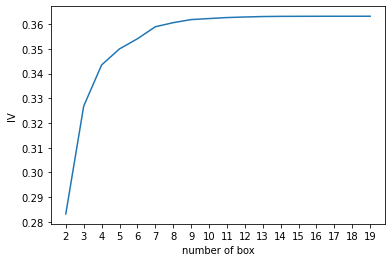

In [74]:
num_bins_ = num_bins.copy()

import matplotlib.pyplot as plt
import scipy

IV = []
axisx = []

# 2控制最终的合并箱体个数
while len(num_bins_) > 2:
    pvs = []
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        # 获取 num_bins_两两之间的卡方检验的置信度(或卡方值)
        x2 = num_bins_[i+1][2:]
        # 0 返回 chi2 值,1 返回 p 值。计算卡方值
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
        pvs.append(pv)
    # 通过 p 值进行处理。合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(
                        num_bins_[i][0],
                        num_bins_[i+1][1],
                        num_bins_[i][2]+num_bins_[i+1][2],
                        num_bins_[i][3]+num_bins_[i+1][3])]
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
    
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

## 用最佳分箱个数分箱，并验证分箱结果

In [88]:
def get_bin(num_bins_,n):
    while len(num_bins_) > n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            # chi2 = scipy.stats.chi2_contingency([x1,x2])[0]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(
                            num_bins_[i][0],
                            num_bins_[i+1][1],
                            num_bins_[i][2]+num_bins_[i+1][2],
                            num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [112]:
afterbins = get_bin(num_bins,7)
len(afterbins)

7

In [113]:
afterbins

[(21.0, 36.0, 14766, 24993),
 (36.0, 52.0, 34362, 46720),
 (52.0, 56.0, 9228, 9079),
 (56.0, 61.0, 11271, 8285),
 (61.0, 68.0, 13661, 5512),
 (68.0, 74.0, 6863, 1897),
 (74.0, 109.0, 7797, 1357)]

In [114]:
# bins_dft = get_woe(num_bins)
# bins_dft

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,36.0,14766,24993,39759,0.203069,0.628612,0.150753,0.255440,-0.527341
1,36.0,52.0,34362,46720,81082,0.414125,0.576207,0.350819,0.477500,-0.308294
2,52.0,56.0,9228,9079,18307,0.093503,0.495931,0.094213,0.092792,0.015206
3,56.0,61.0,11271,8285,19556,0.099882,0.423655,0.115071,0.084676,0.306714
4,61.0,68.0,13661,5512,19173,0.097926,0.287488,0.139472,0.056335,0.906545
5,68.0,74.0,6863,1897,8760,0.044742,0.216553,0.070068,0.019388,1.284798
6,74.0,109.0,7797,1357,9154,0.046754,0.148241,0.079603,0.013869,1.747390


## 将选取最佳分箱个数的过程封装为函数

In [118]:
def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数,基于卡方检验的分箱
    参数:
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()
    
    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]
    
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                            num_bins[0][0],
                            num_bins[1][1],
                            num_bins[0][2]+num_bins[1][2],
                            num_bins[0][3]+num_bins[1][3])]
            continue
        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(
                                    num_bins[i-1][0],
                                    num_bins[i][1],
                                    num_bins[i-1][2]+num_bins[i][2],
                                    num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break
        
    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df
    
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv
    
    IV = []
    axisx = []
    
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins)-1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
            
        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(
                            num_bins[i][0],
                            num_bins[i+1][1],
                            num_bins[i][2]+num_bins[i+1][2],
                            num_bins[i][3]+num_bins[i+1][3])]
#         global bins_df
        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))
        
    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()
        
    return bins_df

In [119]:
test_data = model_data.copy()

RevolvingUtilizationOfUnsecuredLines


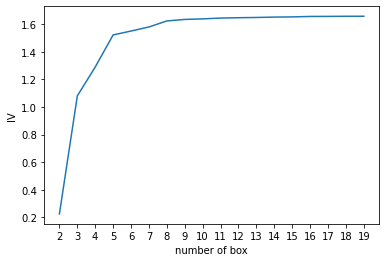

age


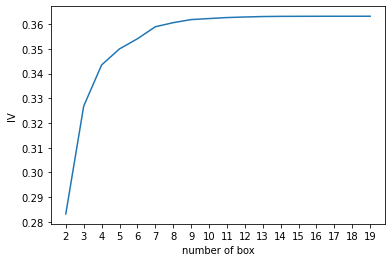

NumberOfTime30-59DaysPastDueNotWorse


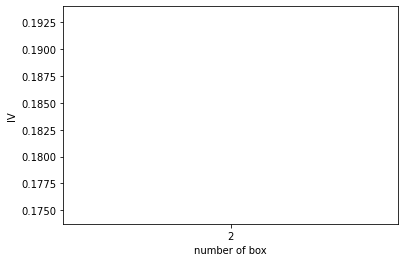

DebtRatio


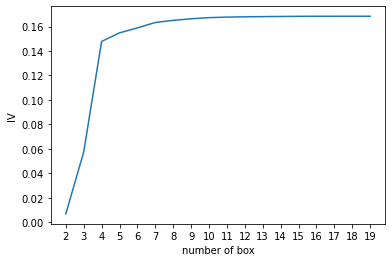

MonthlyIncome


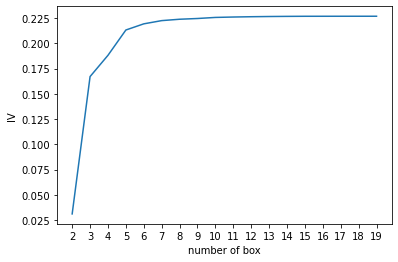

NumberOfOpenCreditLinesAndLoans


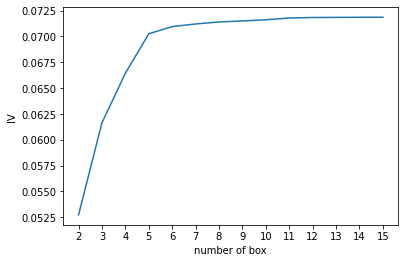

NumberOfTimes90DaysLate


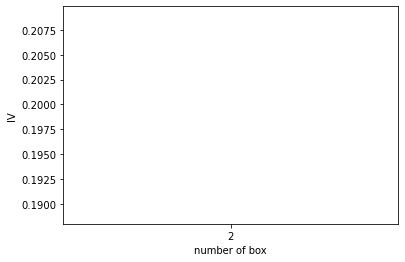

NumberRealEstateLoansOrLines


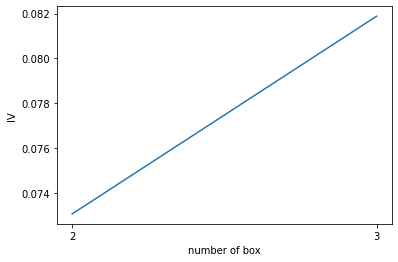

NumberOfTime60-89DaysPastDueNotWorse


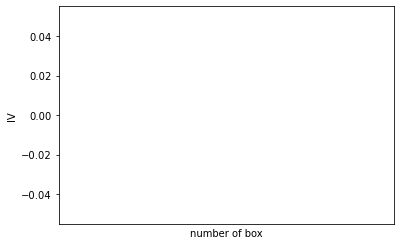

NumberOfDependents


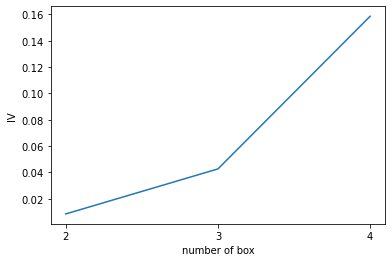

In [120]:
for i in test_data.columns[1:-1]:
    print(i)
    graphforbestbin(test_data,i,"SeriousDlqin2yrs",n=2,q=20)